# Comparing *E. coli* C assembly against other complete *E. coli* genomes 

-----

In this notebook we process data generated by aligning our assembly against all fully sequenced *E. coli* genomes from NCBI. The alignemnt was computed in Galaxy and here we perform additional manipulations of these data.


In [1]:
# Make sure cells are full width of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import necessary Python libraries
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import numpy as np
import pylab as pl
from matplotlib import collections as mc
import matplotlib.ticker as ticker

In [2]:
%cd /Volumes/data4t/seq/EcoliC/genome_cmp

/Volumes/data4t/seq/EcoliC/genome_cmp


First, we will read the `megablast` output into a Pandas dataframe, which we will call `mb` (for megablast):

In [3]:
mb = pd.read_table('c_vs_all', header=None)

Next, we will provide names for the columns:

In [4]:
mb.columns = ['q','t','id','len','mism','gap','qstart','qend','tstart','tend','E','bit']

Let's take a quick look at the data:

In [5]:
mb.head()

,q,t,id,len,mism,gap,qstart,qend,tstart,tend,E,bit
0,1,LT906474.1,99.999,2809169,13,2,1,2809167,1,2809169,0.0,5187000.0
1,1,LT906474.1,99.997,1323487,29,5,3252806,4576290,3302485,4625968,0.0,2444000.0
2,1,LT906474.1,100.000,443656,2,0,2809156,3252811,2809125,3252780,0.0,819300.0
3,1,CP020543.1,99.999,1432346,10,4,406431,1838775,406140,1838482,0.0,2645000.0
4,1,CP020543.1,99.997,1266576,34,7,3252806,4519378,3303410,4569981,0.0,2339000.0


To remove noise and make downstream computation faster we will get rid of all alignemnts that are shorter or equal to 10,000 bp:

In [6]:
mb = pysqldf("select * from mb where len > 10000")

## Finding closely realated genomes

-----

First, let's see which *E. coli* genomes are most closely related to our assembly.

Now, using `pysqldf` module we will perform an SQL query on these data. In particular we will group the data on `t` (Target = name of the sequence we are aligning against) and compute the following metrics:

 - Number of alignments between our assemby and each target (`count(*) as N`)
 - Average nucleotide identity (`avg(id) as av_id`)
 - Total alignment length (`sum(len) as tot_len`)
 
The result will be stored in a new dataframe called `best`:

In [7]:
best = pysqldf("select t, count(*) as N, avg(id) as av_id, sum(len) as tot_len from mb where len > 10000 group by t order by N asc")

What are the top targets having the highest homology to our assembly? Let's see:

In [8]:
pysqldf("select * from best where tot_len > 4000000 order by N asc")

,t,N,av_id,tot_len
0,LT906474.1,3,99.998667,4576312
1,CP020543.1,7,99.998429,4566125
2,CP024090.1,13,99.997846,4539969
3,CP009166.1,81,99.226148,4141838
4,CP010371.1,81,99.152605,4085374
5,CP010152.1,84,99.220060,4094359
6,CP013952.1,84,99.226738,4004276
7,CP010143.1,86,99.174733,4132562
8,CP026026.1,86,99.193826,4023972
9,LM995446.1,86,99.222930,4072922


Above you can see that the first three genomes (LT906474.1, LT906474.1, and CP024090.1) are most similar to ours, but this quickly deteriorates for other genomes with the number of alignemnts quickly increasing (`N` column). This can be easily visualized as follows:

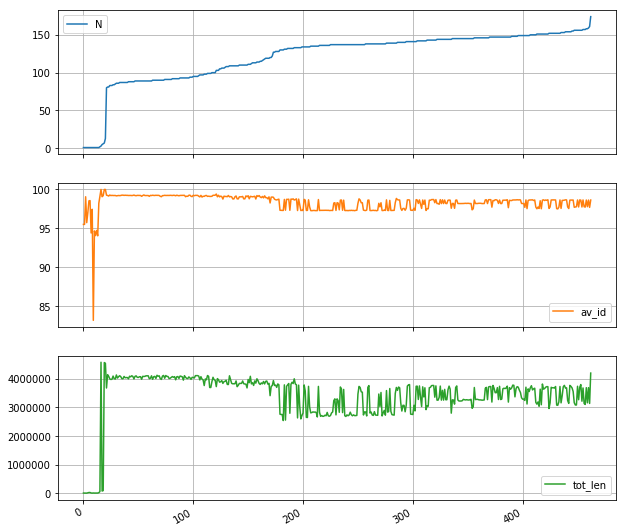

In [9]:
%matplotlib inline
best.plot(grid=True,subplots=True, figsize=(10, 10));

## Comparing genome architecture

-----

Now we want to get a rough idea of how our genome compares with genomes of closely related *E. coli* strains. Are there rearrangements, duplications, etc? 

So, based on previous calculations LT906474.1, CP020543.1, CP024090.1, and CP010235.1 appear to be the most closely related genomes. First, we create an array containing their IDs:

In [19]:
top = ['LT906474.1','CP020543.1']

We will use coordinates of alignemnts produced by megablast and plot pairiwise relationship among these genomes (aka. dotplots). To do this we need to convert coordinates in the form of an array that looks like this:

`[[start in our genome, start in other E. coli], [end in our genome, end in other E. coli]]`

The following code accomplished this:

In [20]:
# For top accession number create a dictionary, where for each accession number
# There is a list of starts end ends for blast between our assembly and E. coli accessions

from collections import defaultdict
strain_data = defaultdict(list) 

for strain in top:
    coord = []
    for row in pysqldf(("select qstart,qend,tstart,tend from mb where t = '%s'") % ( strain )).values.tolist():
        coord.append( [[row[0],row[2]],[row[1],row[3]]] )
    strain_data[ strain ] = coord

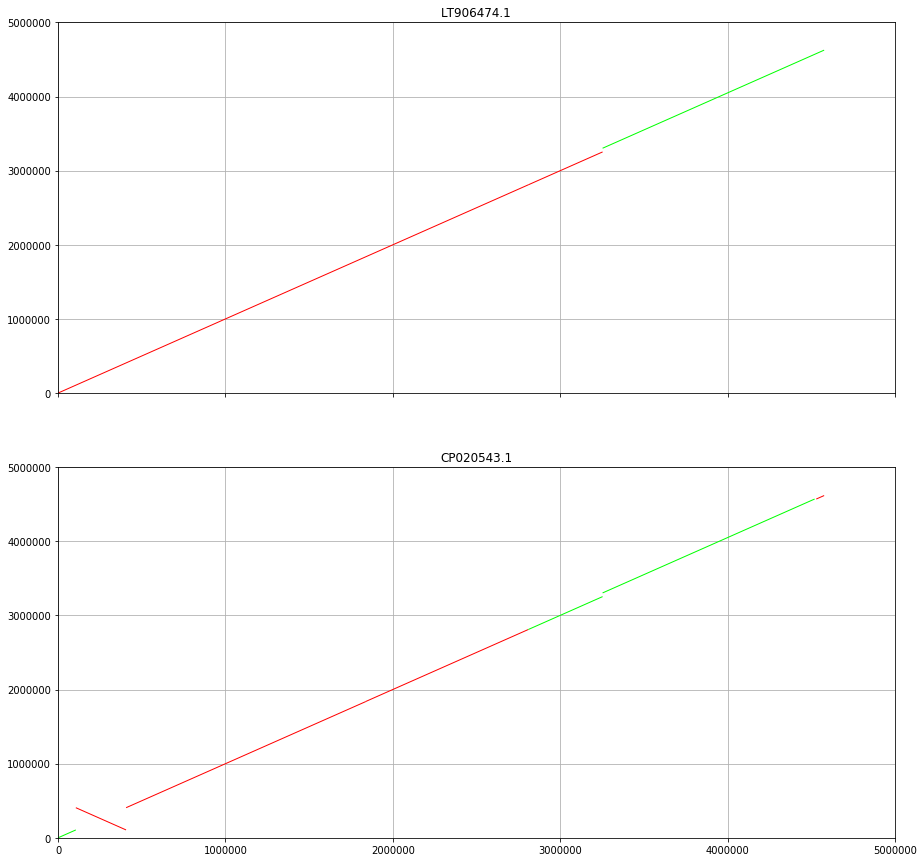

In [30]:
# Here we generate dot plot for four alignemnts

import numpy as np
import pylab as pl
from matplotlib import collections as mc
import matplotlib.ticker as ticker

c = np.array([(1, 0, 0, 1), (0, 1, 0, 1)])

fig, ax = pl.subplots( 2,1, figsize=(15, 15), sharey=True, sharex=True )

ax = ax.ravel()

for i, strain in enumerate( strain_data  ):
    lc = mc.LineCollection(strain_data[ strain ], colors=c, linewidths=1)
    ax[i].add_collection(lc)
    ax[i].autoscale()
    ax[i].set_title('%s' % strain )
    ax[i].plot()
    ax[i].set_ylim([0,5000000])
    ax[i].set_xlim([0,5000000])
    ax[i].grid(True)
    ax[i].margins(0.1)
    
pl.show()

In [31]:
pysqldf("select *, tstart-qstart, tend-qend from mb where len > 10000 and t = 'LT906474.1' order by qstart")

,q,t,id,len,mism,gap,qstart,qend,tstart,tend,E,bit,tstart-qstart,tend-qend
0,1,LT906474.1,99.999,2809169,13,2,1,2809167,1,2809169,0.0,5187000.0,0,2
1,1,LT906474.1,100.000,443656,2,0,2809156,3252811,2809125,3252780,0.0,819300.0,-31,-31
2,1,LT906474.1,99.997,1323487,29,5,3252806,4576290,3302485,4625968,0.0,2444000.0,49679,49678


In [32]:
pysqldf("select *, tstart-qstart, tend-qend  from mb where len > 10000 and t = 'CP020543.1' order by qstart")

,q,t,id,len,mism,gap,qstart,qend,tstart,tend,E,bit,tstart-qstart,tend-qend
0,1,CP020543.1,99.999,106106,1,0,1,106106,49,106154,0.0,195900.0,48,48
1,1,CP020543.1,99.996,299993,3,2,106098,406089,406139,106154,0.0,553900.0,300041,-299935
2,1,CP020543.1,99.999,1432346,10,4,406431,1838775,406140,1838482,0.0,2645000.0,-291,-293
3,1,CP020543.1,99.999,970396,9,3,1838772,2809167,1839704,2810096,0.0,1792000.0,932,929
4,1,CP020543.1,99.999,443656,5,1,2809156,3252811,2810052,3253706,0.0,819200.0,896,895
5,1,CP020543.1,99.997,1266576,34,7,3252806,4519378,3303410,4569981,0.0,2339000.0,50604,50603
6,1,CP020543.1,100.000,47052,0,0,4529191,4576242,4569973,4617024,0.0,86889.0,40782,40782


In [168]:
files = ['LT.gff','CP.gff']
o = open("parsed.gff","w")
gene = pd.DataFrame()

for file in files:
    for line in open(file,'r'):
        if not line.startswith('#'):
            fields = line.split('\t')
            try:
                if fields[2] == 'gene':
                    out_line = "\t".join([fields[0],fields[3],fields[4], fields[6], fields[8].split(';')[1][5:]])
                    o.write('{}\n'.format(out_line))
            except:
                print('Error in >{}'.format(line))

Error in >

Error in >



In [170]:
gene = pd.read_table('parsed.gff', header=None)

In [173]:
gene.columns = ['acc','start','stop','strand','name']

In [174]:
gene.head()

,acc,start,stop,strand,name
0,LT906474.1,70,1404,+,dnaA
1,LT906474.1,1409,2509,+,dnaN
2,LT906474.1,2509,3582,+,recF
3,LT906474.1,3611,6025,+,gyrB
4,LT906474.1,6265,6663,+,yidB


In [195]:
pysqldf("select * from gene where acc = 'LT906474.1' and start > 3252780 and stop < 3302485")

,acc,start,stop,strand,name
0,LT906474.1,3253144,3255249,-,cstA
1,LT906474.1,3255430,3255843,-,entH
2,LT906474.1,3255846,3256592,-,entA
3,LT906474.1,3256592,3257449,-,entB
4,LT906474.1,3257463,3259073,-,entE
5,LT906474.1,3259083,3260258,-,entC
6,LT906474.1,3260633,3261589,+,fepB
7,LT906474.1,3261593,3262843,-,entS
8,LT906474.1,3262954,3263958,+,fepD
9,LT906474.1,3263955,3264947,+,fepG


In [192]:
wp5 = pysqldf("select * from gene where acc = 'LT906474.1' and start > 3252780 and stop < 3302485")

In [179]:
pysqldf("select * from gene where acc = 'CP020543.1' and start > 3253706 and stop < 3303410")

,acc,start,stop,strand,name
0,CP020543.1,3254070,3256175,-,B6N50_16665
1,CP020543.1,3256356,3256769,-,B6N50_16670
2,CP020543.1,3256772,3257518,-,B6N50_16675
3,CP020543.1,3257518,3258375,-,B6N50_16680
4,CP020543.1,3258389,3259999,-,entE
5,CP020543.1,3260009,3261184,-,B6N50_16690
6,CP020543.1,3261349,3261555,+,B6N50_16695
7,CP020543.1,3261559,3262515,+,B6N50_16700
8,CP020543.1,3262519,3263769,-,B6N50_16705
9,CP020543.1,3263880,3264884,+,B6N50_16710


In [185]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 1.8MB/s ta 0:00:01


In [190]:
ess = pd.read_excel("http://mbio.asm.org/content/9/1/e02096-17/DC7/embed/inline-supplementary-material-7.xlsx", header=1)

In [191]:
ess.head()

,Gene,Insertion Index Score,Log Likelihood Ratio,Essential,Non-essential,Unclear
0,thrL,0.242424,54.626410,False,True,False
1,thrA,0.149817,32.642621,False,True,False
2,thrB,0.177921,39.389847,False,True,False
3,thrC,0.149184,32.489551,False,True,False
4,yaaX,0.161616,35.485996,False,True,False


In [194]:
pysqldf("select * from wp5 left join ess on wp5.name = ess.Gene")

,acc,start,stop,strand,name,Gene,Insertion Index Score,Log Likelihood Ratio,Essential,Non-essential,Unclear
0,LT906474.1,3253144,3255249,-,cstA,cstA,0.126306,26.919065,0.0,1.0,0.0
1,LT906474.1,3255430,3255843,-,entH,entH,0.120773,25.558626,0.0,1.0,0.0
2,LT906474.1,3255846,3256592,-,entA,entA,0.104418,21.498726,0.0,1.0,0.0
3,LT906474.1,3256592,3257449,-,entB,entB,0.088578,17.497706,0.0,1.0,0.0
4,LT906474.1,3257463,3259073,-,entE,entE,0.105525,21.775523,0.0,1.0,0.0
5,LT906474.1,3259083,3260258,-,entC,entC,0.102891,21.116439,0.0,1.0,0.0
6,LT906474.1,3260633,3261589,+,fepB,fepB,0.056426,9.033369,0.0,1.0,0.0
7,LT906474.1,3261593,3262843,-,entS,entS,0.108713,22.571116,0.0,1.0,0.0
8,LT906474.1,3262954,3263958,+,fepD,fepD,0.058706,9.656014,0.0,1.0,0.0
9,LT906474.1,3263955,3264947,+,fepG,fepG,0.057402,9.300311,0.0,1.0,0.0
